In [233]:
# import required package for data handling and analyzation
import pandas as pd
import numpy as np
import re
import statsmodels.api as sm
from scipy import stats
import matplotlib as plt
import seaborn as sns

In [234]:
# import required packages for splitting data
#from sklearn import model_selection
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import train_test_split

# import required packages for evaluating models
#from sklearn import metrics
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report
#rom sklearn.metrics import roc_auc_score
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import precision_recall_fscore_support

# import `logistic regression` model
#from sklearn.linear_model import LogisticRegression

In [235]:
#initial importing of the raw data to be cleaned
df = pd.read_excel('Competition1_raw_data.xlsx',na_values=r'-')

In [236]:
#taking a look at the data to see if there are any visivble errors
#10 shows "-" as blank values
df.head(15)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0
5,ACOM,Ancestry.com Inc.,7379,13.5,14.5,12.5,14.200000,94.0,1.0,0.06,...,7407407.0,197.591,510.0,17999.0,13934.0,328.0,815.0,62.0,96.0,181.0
6,ACOR,ACORDA THERAPEUTICS INC,2836,6.0,13.0,11.0,6.720000,128.0,1.0,-1.87,...,5500000.0,5.146,495.0,15758.0,13953.0,379.0,698.0,82.0,106.0,135.0
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5.0,14.0,12.0,4.550000,91.0,0.0,-0.74,...,8000000.0,NaN,334.0,11226.0,10056.0,276.0,-1.0,55.0,120.0,122.0
8,ACTV,ACTIVE NETWORK INC,7372,15.0,18.0,16.0,15.900000,100.0,1.0,-0.51,...,11000000.0,279.600,620.0,14813.0,13463.0,335.0,917.0,58.0,124.0,234.0
9,ACW,ACCURIDE CORP,3714,9.0,19.0,17.0,0.000000,106.0,1.0,1.49,...,11000000.0,494.008,385.0,9134.0,8107.0,198.0,459.0,81.0,90.0,147.0


In [237]:
df.info() # getting more info on the data
#df.describe() #not needed at the moment because all types are objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null float64
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: float64(19), object(3)
memory usage: 117.3+ KB


In [238]:
df_copy = df.copy() # making a copy of the dataframe to preserve the original data

In [239]:
#initial attempt to change the data types
df_copy.iloc[:,3:8].astype(float)
df_copy.iloc[:,9:].astype(float)
df_copy['C2'] = df_copy['C2'].astype('category')
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null category
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: category(1), float64(18), object(3)
memory usage: 112.8+ KB


In [240]:
df_copy.iloc[[10,86,268,330,400,490,597,614],2]

10     NaN
86     NaN
268    NaN
330    NaN
400    NaN
490    NaN
597    NaN
614    NaN
Name: I3, dtype: object

In [241]:
missing_I3 = [8051,5122,6798,6199,8221,3200,6099,4724]

In [242]:
df_copy.iloc[[10,86,268,330,400,490,597,614],2] = missing_I3
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         682 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null category
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: category(1), float64(18), object(3)
memory usage: 112.8+ KB


In [243]:
col_list = df_copy.columns.tolist()
del col_list[0:4]
del col_list[4]

#### Think about this question, “Given my data … if there is a deviation from normality, will there be a material impact my results?”

#### In doing so are three tests you might want to consider:

    -The Shapiro-Wilk test;
    -The Anderson-Darling test, and;
    -The Kolmogorov-Smirnov test.

#### As well, there are some visual measures to be implemented:

    -Box Plots
    -QQ Plots

In [244]:
#sm.qqplot(df_copy['C7'])

In [245]:
#float_cols = col_list
#replacement = df_copy.loc[:,float_cols]
#print(replacement)

In [246]:
#float_cols

In [247]:
# issolate the value of the issue then convert it to NaN
#issue = df_copy.iloc[10,4]
#print(issue)
#soulution = float('Nan')
#import re
#df_copy.replace(to_replace= r'^-', value=soulution,regex=True, inplace =True)

In [248]:
# test if the issue is resolved and to see if unintedned values were changed
#print(df_copy.head(11))
#print(df_copy.iloc[162,1],df_copy.iloc[10,4])

In [249]:
# second attempt to convert dtypes to match the data dictionary
#df_copy.iloc[:,3:8].astype(float)
#df_copy.iloc[:,9:].astype(float)
#df_copy['C2'] = df_copy['C2'].astype('category')
#df_copy.dtypes

In [250]:
# now we can look a the statistical description of the data
# also include all featured to determine if the the stock symbols and names (I1 & I2) has duplicates
df_copy.describe(include='all')

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,682,682,682.0,677.000000,672.000000,672.000000,660.000000,660.000000,660.0,646.000000,...,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
unique,682,682,207.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ENTR,KINTERA INC,2834.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,76.0,NaN,NaN,NaN,NaN,NaN,567.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,13.837666,15.481190,13.515045,25.934766,149.728788,NaN,1.788904,...,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,NaN,NaN,NaN,6.053731,6.653429,5.835646,73.234948,152.817467,NaN,162.666532,...,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,NaN,NaN,NaN,3.000000,0.000000,3.000000,0.000000,10.000000,NaN,-786.239000,...,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,NaN,NaN,NaN,10.000000,12.500000,11.000000,11.000000,85.000000,NaN,-0.852500,...,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,NaN,NaN,NaN,13.500000,15.000000,13.000000,14.845000,107.000000,NaN,0.010000,...,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,NaN,NaN,NaN,17.000000,17.000000,15.000000,20.485000,155.250000,NaN,0.470000,...,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000


In [251]:
df_copy.isnull().sum()

I1          0
I2          0
I3          0
P(IPO)      5
P(H)       10
P(L)       10
P(1Day)    22
C1         22
C2         22
C3         36
C4         22
C5          6
C6          6
C7         72
T1          1
T2          1
T3          1
T4          1
T5          1
S1          1
S2          1
S3          1
dtype: int64

In [252]:
#for feature in col_list: 
 #   print(plt.pyplot.hist(df_copy[feature], bins=10,range=[0,40]))


In [253]:
#plt.pyplot.hist(df_copy[col_list], bins=10, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, data=None)

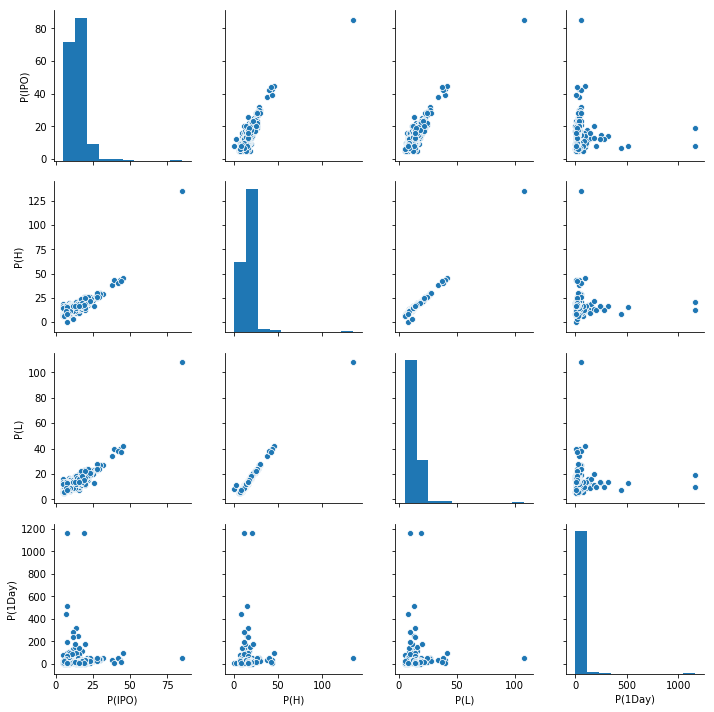

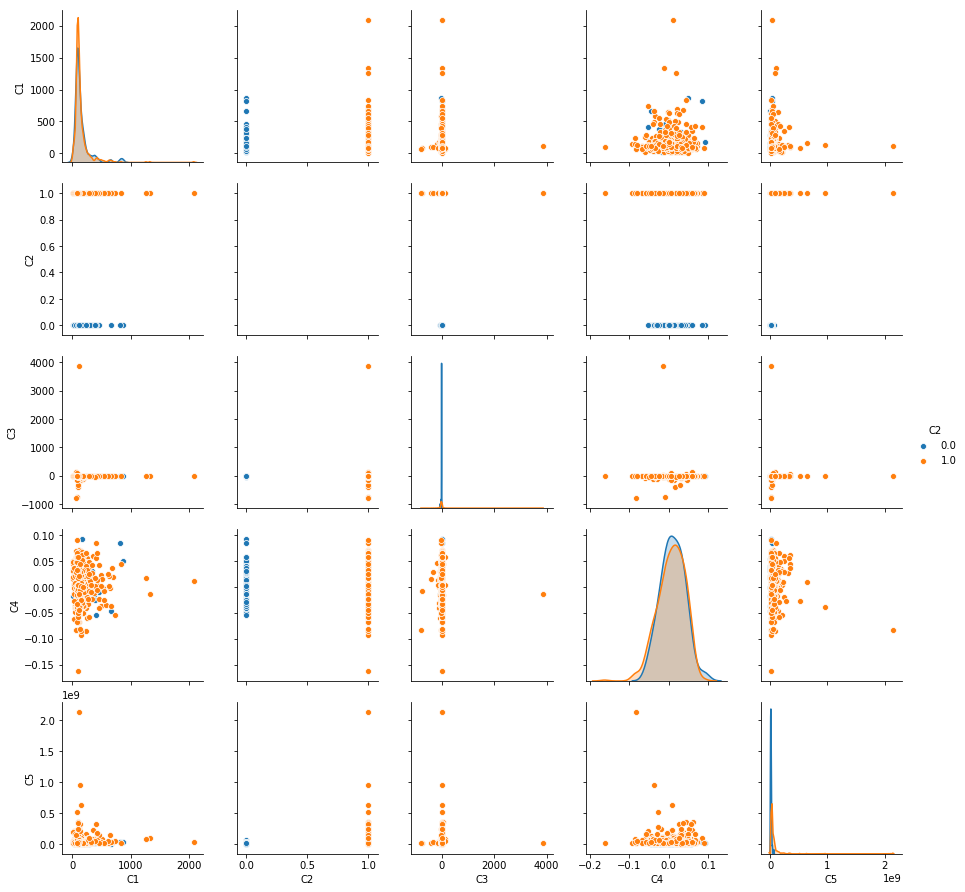

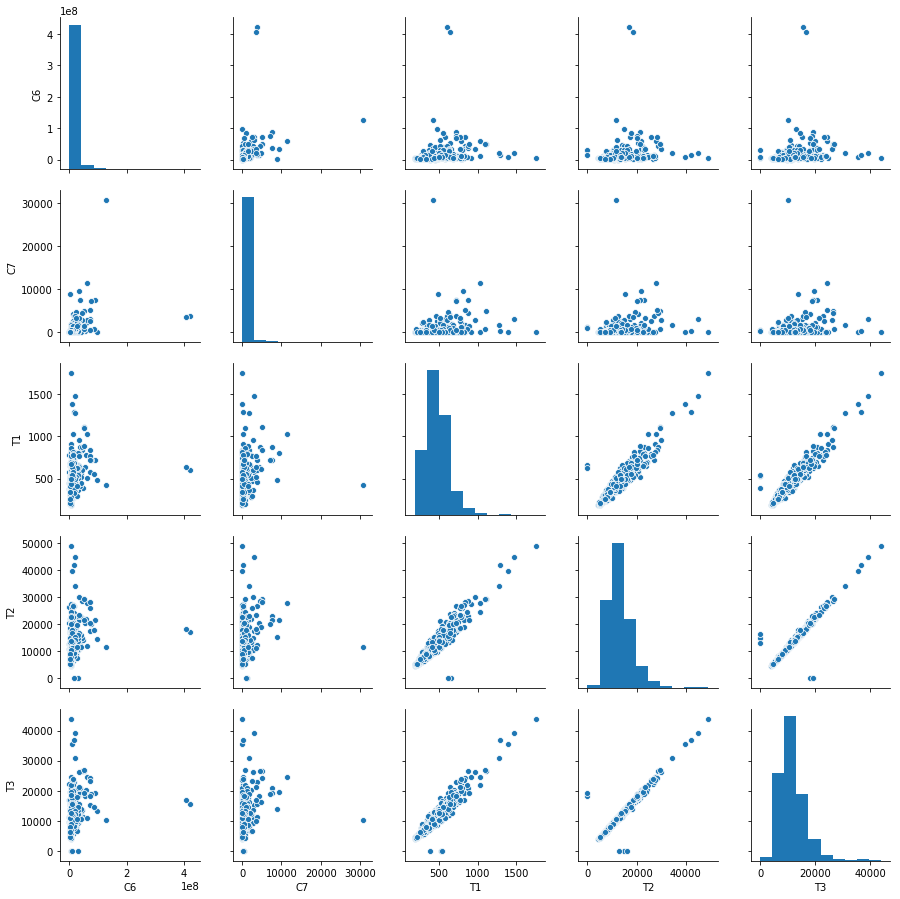

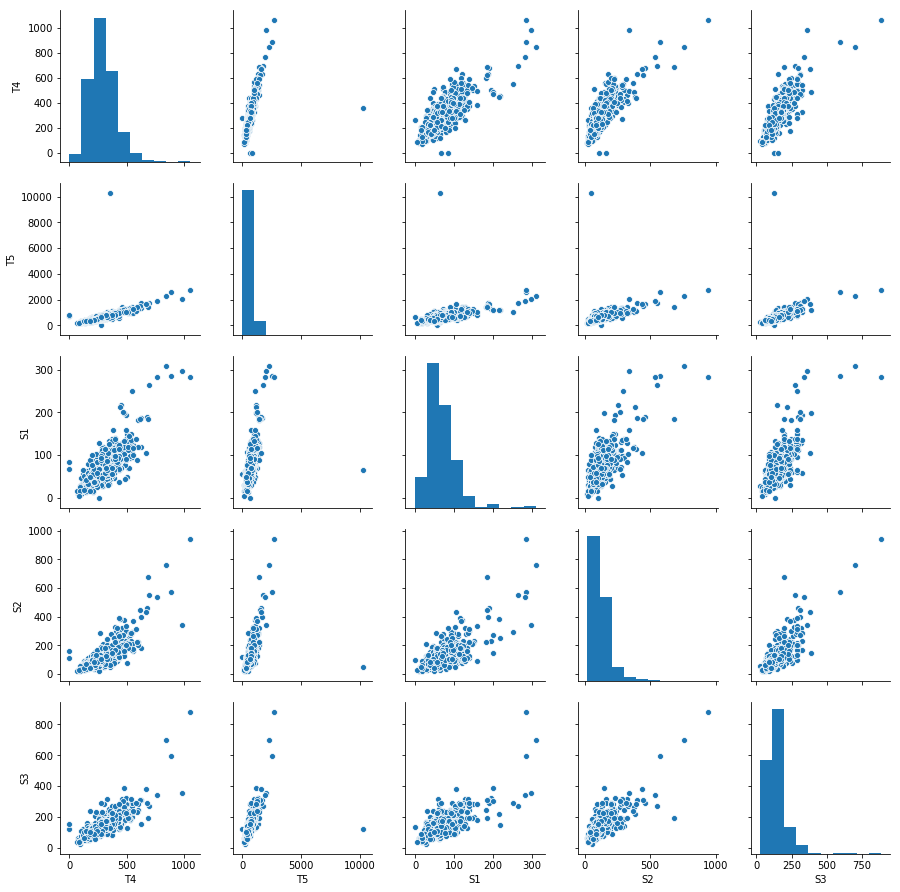

In [254]:
p_df = df_copy.iloc[:,3:7].dropna()
sns.pairplot(p_df, dropna =False)
c_df = df_copy.iloc[:,7:12].dropna()
sns.pairplot(c_df, dropna =False,hue="C2")
t_df = df_copy.iloc[:,12:17].dropna()
sns.pairplot(t_df, dropna =False)
s_df = df_copy.iloc[:,17:].dropna()
sns.pairplot(s_df, dropna =False)

In [255]:
# Create the random variables with mean 5, and sd 3
#x_10 = stats.norm.rvs(loc=5, scale=3, size=10)
#x_50 = stats.norm.rvs(loc=5, scale=3, size=50)
#x_100 = stats.norm.rvs(loc=5, scale=3, size=100)
#x_1000 = stats.norm.rvs(loc=5, scale=3, size=1000)# Print the p values
print (stats.shapiro(p_df))
#print stats.shapiro(x_50)
#print stats.shapiro(x_100)
#print stats.shapiro(x_1000)

(0.11770349740982056, 0.0)


In [256]:
for feature in col_list:
    print (stats.shapiro(df_copy[feature].dropna()))

(0.5787540674209595, 2.435843040957177e-37)
(0.6520932912826538, 8.472509842964768e-35)
(0.18314379453659058, 0.0)
(0.5376947522163391, 2.5019657192297023e-38)
(0.06939828395843506, 0.0)
(0.984643816947937, 2.0478564692893997e-06)
(0.2703436613082886, 2.802596928649634e-45)
(0.2621653079986572, 1.401298464324817e-45)
(0.26498883962631226, 1.2891945871788317e-43)
(0.9011947512626648, 1.5088911746309485e-20)
(0.9068135619163513, 5.64979092528379e-20)
(0.9087802171707153, 9.094074706961417e-20)
(0.9241844415664673, 5.043558422752225e-18)
(0.4631335139274597, 6.518700326192617e-41)
(0.8291034698486328, 2.4478084258815782e-26)
(0.7090387344360352, 1.0738206281634861e-32)
(0.7925224304199219, 1.4296504181570782e-28)


AxesSubplot(0.125,0.125;0.775x0.755)


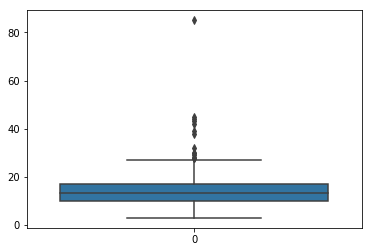

In [257]:
print(sns.boxplot(data = df_copy['P(IPO)'].dropna()))

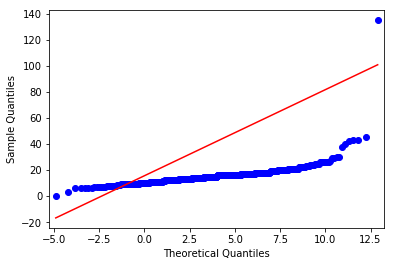

In [258]:

import pylab
sm.qqplot(p_df['P(H)'],loc = 4, scale = 3, line='s')
pylab.show()

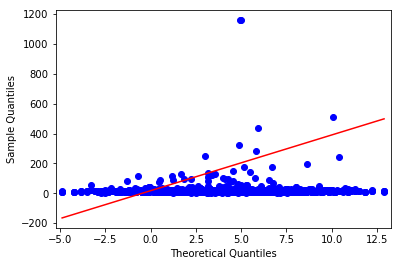

In [259]:
sm.qqplot(p_df,loc = 4, scale = 3, line='s')
pylab.show()

In [260]:
#ad_test = stats.anderson(p_df, dist='norm')
#print(ad_test)

In [261]:
df_copy.info()
print(df.head(50))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         682 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null category
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: category(1), float64(18), object(3)
memory usage: 112.8+ KB
      I1                                     I2    I3  P(IPO)  P(H)  P(L)  \
0   AATI     ADVANCED ANALOGIC TECHNOLOGIES INC 

In [262]:
df_copy.mean()

P(IPO)     1.383767e+01
P(H)       1.548119e+01
P(L)       1.351504e+01
P(1Day)    2.593477e+01
C1         1.497288e+02
C3         1.788904e+00
C4         7.282201e-03
C5         4.935776e+07
C6         1.241519e+07
C7         5.004600e+02
T1         4.656344e+02
T2         1.275861e+04
T3         1.139584e+04
T4         2.943539e+02
T5         6.792203e+02
S1         6.842144e+01
S2         1.201043e+02
S3         1.447592e+02
dtype: float64

# Imputation Code

In [263]:
df_mean = df_copy.fillna(df_copy.mean())
df_median = df_copy.fillna(df_copy.median())
df_mode = df_copy.fillna(df_copy.mode[0](dropna=True,numeric_only=True))

In [264]:
df_median['C4'].head(25)

0     0.029074
1    -0.013352
2     0.020715
3     0.020023
4    -0.034895
5    -0.057556
6     0.004106
7     0.040620
8    -0.029316
9    -0.024925
10    0.009125
11    0.015487
12    0.019731
13   -0.006316
14    0.023275
15   -0.085455
16    0.000255
17   -0.006316
18    0.036831
19   -0.012692
20    0.045263
21    0.054040
22    0.002546
23    0.035828
24   -0.001746
Name: C4, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f302fa83198>,
      dtype=object)

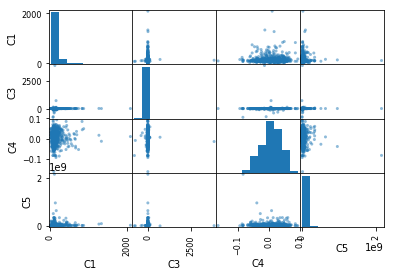

In [274]:
pd.plotting.scatter_matrix(df_mean[col_list].iloc[:,3:7])
#p_df = df_copy.iloc[:,3:7].dropna()
#sns.pairplot(p_df, dropna =False)
#c_df = df_copy.iloc[:,7:12].dropna()
#sns.pairplot(c_df, dropna =False,hue="C2")
#t_df = df_copy.iloc[:,12:17].dropna()
#sns.pairplot(t_df, dropna =False)
#s_df = df_copy.iloc[:,17:].dropna()
#sns.pairplot(s_df, dropna =False)

# Correlation Code

In [266]:
# evaluates ranked variables or ordinal
# used if we have not normalized first
df_copy.corr(method ='spearman')

,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
P(IPO),1.000000,0.809617,0.811717,0.666140,-0.072471,0.181958,-0.003208,0.360506,0.399008,0.433270,0.275886,0.244169,0.228779,0.251822,0.205606,0.169703,0.186997,0.179541
P(H),0.809617,1.000000,0.996178,0.452227,-0.067610,0.143857,-0.041044,0.378831,0.451705,0.512820,0.298489,0.279924,0.269374,0.284070,0.255776,0.259077,0.265329,0.209142
P(L),0.811717,0.996178,1.000000,0.455434,-0.064446,0.147905,-0.045274,0.383055,0.458086,0.515297,0.303887,0.285547,0.274808,0.289790,0.261779,0.266787,0.271229,0.214124
P(1Day),0.666140,0.452227,0.455434,1.000000,-0.035335,0.047677,0.002041,0.220125,0.197368,0.169733,0.099683,0.101128,0.088068,0.100701,0.071609,0.044098,0.047058,0.092781
C1,-0.072471,-0.067610,-0.064446,-0.035335,1.000000,0.048713,0.090858,0.051373,0.002656,0.071588,0.145630,0.144355,0.154437,0.135626,0.166949,0.121943,0.135878,0.134383
C3,0.181958,0.143857,0.147905,0.047677,0.048713,1.000000,0.017738,0.136817,0.172106,0.364470,0.130422,0.115383,0.112591,0.129310,0.048270,0.137542,0.077802,0.060601
C4,-0.003208,-0.041044,-0.045274,0.002041,0.090858,0.017738,1.000000,-0.020054,0.009971,0.017162,0.001716,0.014984,0.024476,0.021303,0.042357,0.035068,0.025639,0.047292
C5,0.360506,0.378831,0.383055,0.220125,0.051373,0.136817,-0.020054,1.000000,0.759621,0.492970,0.497667,0.511162,0.509283,0.518867,0.509524,0.421100,0.433503,0.436225
C6,0.399008,0.451705,0.458086,0.197368,0.002656,0.172106,0.009971,0.759621,1.000000,0.568421,0.454638,0.447825,0.450073,0.461196,0.427662,0.384157,0.418368,0.361932
C7,0.433270,0.512820,0.515297,0.169733,0.071588,0.364470,0.017162,0.492970,0.568421,1.000000,0.405390,0.380010,0.370349,0.403199,0.322461,0.353053,0.378777,0.277557


In [267]:
# evaluates ranked variables or ordinal
# used if we have not normalized first
# prefered in small samples or if there are outliers
# more accurate than spearman
df_copy.corr(method ='kendall')

,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
P(IPO),1.000000,0.662141,0.665418,0.572653,-0.050507,0.127904,-0.001385,0.251929,0.283993,0.306164,0.188029,0.165735,0.154607,0.170397,0.140316,0.115047,0.128059,0.122401
P(H),0.662141,1.000000,0.984098,0.341273,-0.047251,0.101901,-0.028245,0.270304,0.325704,0.363941,0.207224,0.194304,0.186747,0.196502,0.178541,0.179550,0.186361,0.147242
P(L),0.665418,0.984098,1.000000,0.344580,-0.045345,0.104878,-0.031257,0.273756,0.330746,0.366161,0.211022,0.198478,0.190791,0.200604,0.182788,0.185495,0.190680,0.150964
P(1Day),0.572653,0.341273,0.344580,1.000000,-0.022896,0.034801,0.000589,0.149518,0.136150,0.118212,0.067975,0.067445,0.058516,0.067117,0.047682,0.028692,0.031230,0.062272
C1,-0.050507,-0.047251,-0.045345,-0.022896,1.000000,0.032995,0.061088,0.033206,0.001096,0.048778,0.098179,0.098121,0.105485,0.092268,0.113953,0.083913,0.092179,0.090790
C3,0.127904,0.101901,0.104878,0.034801,0.032995,1.000000,0.012255,0.092749,0.119074,0.264361,0.085413,0.075085,0.072942,0.085525,0.029198,0.093303,0.050091,0.038885
C4,-0.001385,-0.028245,-0.031257,0.000589,0.061088,0.012255,1.000000,-0.014253,0.006532,0.011320,0.001294,0.009731,0.015717,0.013705,0.027743,0.023163,0.017933,0.030827
C5,0.251929,0.270304,0.273756,0.149518,0.033206,0.092749,-0.014253,1.000000,0.590515,0.342627,0.339682,0.350540,0.349562,0.355983,0.352746,0.289880,0.297462,0.300156
C6,0.283993,0.325704,0.330746,0.136150,0.001096,0.119074,0.006532,0.590515,1.000000,0.404914,0.313048,0.308643,0.310171,0.318081,0.296081,0.265593,0.290235,0.250045
C7,0.306164,0.363941,0.366161,0.118212,0.048778,0.264361,0.011320,0.342627,0.404914,1.000000,0.281525,0.263126,0.256217,0.279692,0.220622,0.242021,0.263164,0.189966


In [268]:
# used to evaluate continuous variables
# is prefered for our dataset
# need to normalize before we calcualte
df_copy.corr(method ='pearson')

,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
P(IPO),1.000000,0.872516,0.893161,0.035023,0.007740,0.016171,-0.049179,0.376915,0.364378,0.231523,0.208516,0.184659,0.177317,0.196252,0.166327,0.140707,0.120859,0.134866
P(H),0.872516,1.000000,0.990619,0.036147,-0.019401,0.001620,-0.091712,0.337451,0.317548,0.219530,0.186441,0.174736,0.172949,0.185512,0.165156,0.161512,0.136529,0.126938
P(L),0.893161,0.990619,1.000000,0.039484,-0.013884,0.002558,-0.094727,0.348435,0.334175,0.234458,0.202861,0.189998,0.187807,0.201164,0.181139,0.177620,0.154751,0.142364
P(1Day),0.035023,0.036147,0.039484,1.000000,-0.024694,-0.165893,-0.056002,-0.009069,-0.011433,-0.014705,-0.080203,-0.074194,-0.074842,-0.079288,-0.074612,-0.059374,-0.042225,-0.040381
C1,0.007740,-0.019401,-0.013884,-0.024694,1.000000,0.004850,0.035219,0.005271,0.006681,0.024259,0.141156,0.132994,0.131074,0.124602,0.128384,0.112938,0.127954,0.130711
C3,0.016171,0.001620,0.002558,-0.165893,0.004850,1.000000,0.002506,-0.000824,0.010892,0.004889,0.005113,-0.004163,-0.004041,-0.003852,-0.014029,0.020079,0.011876,-0.008959
C4,-0.049179,-0.091712,-0.094727,-0.056002,0.035219,0.002506,1.000000,-0.089523,-0.102898,-0.001540,-0.017159,-0.015374,-0.001826,-0.006592,0.009302,-0.010529,-0.000351,0.011375
C5,0.376915,0.337451,0.348435,-0.009069,0.005271,-0.000824,-0.089523,1.000000,0.880983,0.404828,0.225240,0.230381,0.234192,0.240277,0.231901,0.216828,0.194686,0.202420
C6,0.364378,0.317548,0.334175,-0.011433,0.006681,0.010892,-0.102898,0.880983,1.000000,0.392825,0.207867,0.205683,0.212993,0.221995,0.208998,0.190183,0.190184,0.166265
C7,0.231523,0.219530,0.234458,-0.014705,0.024259,0.004889,-0.001540,0.404828,0.392825,1.000000,0.218232,0.213110,0.217079,0.226796,0.210736,0.258674,0.328214,0.177568


# Normalization Code

In [269]:
# creating the titles for the log columns and normalizing those columns by taking the log of the original columns
log_col_list =[]
for col in col_list:
    col="l_"+col
    log_col_list.append(col)
log_col_list
df_copy[log_col_list] = np.log(df_copy[col_list])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 39 columns):
I1           682 non-null object
I2           682 non-null object
I3           682 non-null object
P(IPO)       677 non-null float64
P(H)         672 non-null float64
P(L)         672 non-null float64
P(1Day)      660 non-null float64
C1           660 non-null float64
C2           660 non-null category
C3           646 non-null float64
C4           660 non-null float64
C5           676 non-null float64
C6           676 non-null float64
C7           610 non-null float64
T1           681 non-null float64
T2           681 non-null float64
T3           681 non-null float64
T4           681 non-null float64
T5           681 non-null float64
S1           681 non-null float64
S2           681 non-null float64
S3           681 non-null float64
l_P(H)       672 non-null float64
l_P(L)       672 non-null float64
l_P(1Day)    660 non-null float64
l_C1         660 non-null float64
l_C3         

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


In [270]:
# creating the titles for the log columns and normalizing those columns by taking the sqrt of the original columns
sqrt_col_list =[]
for col in col_list:
    col="sqrt_"+col
    sqrt_col_list.append(col)
log_col_list
df_copy[sqrt_col_list] = np.sqrt(df_copy[col_list])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 56 columns):
I1              682 non-null object
I2              682 non-null object
I3              682 non-null object
P(IPO)          677 non-null float64
P(H)            672 non-null float64
P(L)            672 non-null float64
P(1Day)         660 non-null float64
C1              660 non-null float64
C2              660 non-null category
C3              646 non-null float64
C4              660 non-null float64
C5              676 non-null float64
C6              676 non-null float64
C7              610 non-null float64
T1              681 non-null float64
T2              681 non-null float64
T3              681 non-null float64
T4              681 non-null float64
T5              681 non-null float64
S1              681 non-null float64
S2              681 non-null float64
S3              681 non-null float64
l_P(H)          672 non-null float64
l_P(L)          672 non-null float64
l_P(1Day)

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


In [271]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 56 columns):
I1              682 non-null object
I2              682 non-null object
I3              682 non-null object
P(IPO)          677 non-null float64
P(H)            672 non-null float64
P(L)            672 non-null float64
P(1Day)         660 non-null float64
C1              660 non-null float64
C2              660 non-null category
C3              646 non-null float64
C4              660 non-null float64
C5              676 non-null float64
C6              676 non-null float64
C7              610 non-null float64
T1              681 non-null float64
T2              681 non-null float64
T3              681 non-null float64
T4              681 non-null float64
T5              681 non-null float64
S1              681 non-null float64
S2              681 non-null float64
S3              681 non-null float64
l_P(H)          672 non-null float64
l_P(L)          672 non-null float64
l_P(1Day)

In [272]:
# creating the titles for the log columns and normalizing those columns by taking the sqrt of the original columns
inverse_col_list =[]
for col in col_list:
    col="inverse_"+col
    inverse_col_list.append(col)
log_col_list
df_copy[inverse_col_list] = 1/(df_copy[col_list])
df_copy.

Index(['I1', 'I2', 'I3', 'P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'C1', 'C2', 'C3',
       'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3',
       'l_P(H)', 'l_P(L)', 'l_P(1Day)', 'l_C1', 'l_C3', 'l_C4', 'l_C5', 'l_C6',
       'l_C7', 'l_T1', 'l_T2', 'l_T3', 'l_T4', 'l_T5', 'l_S1', 'l_S2', 'l_S3',
       'sqrt_P(H)', 'sqrt_P(L)', 'sqrt_P(1Day)', 'sqrt_C1', 'sqrt_C3',
       'sqrt_C4', 'sqrt_C5', 'sqrt_C6', 'sqrt_C7', 'sqrt_T1', 'sqrt_T2',
       'sqrt_T3', 'sqrt_T4', 'sqrt_T5', 'sqrt_S1', 'sqrt_S2', 'sqrt_S3',
       'inverse_P(H)', 'inverse_P(L)', 'inverse_P(1Day)', 'inverse_C1',
       'inverse_C3', 'inverse_C4', 'inverse_C5', 'inverse_C6', 'inverse_C7',
       'inverse_T1', 'inverse_T2', 'inverse_T3', 'inverse_T4', 'inverse_T5',
       'inverse_S1', 'inverse_S2', 'inverse_S3'],
      dtype='object')